In [1]:
# installing latest version of geopandas.
#!pip install git+git://github.com/geopandas/geopandas.git
git clone https://github.com/geopandas/geopandas.git


SyntaxError: invalid syntax (<ipython-input-1-e1c38c9ddb13>, line 3)

In [595]:
!jupyter nbextension enable --py widgetsnbextension
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [50]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Display propertice
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Date
import datetime
import re

# Maps
import geopandas as gpd
import pycountry

from math import pi

# Display in Jupyter
from IPython.display import display, HTML

#models
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV,Lasso,Ridge

In [18]:
df_19 =  pd.read_csv('../captstone/datasets/data.csv')

In [19]:
df_19 = df_19.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Real Face',
                  'Release Clause'], axis=1)
df_19.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [20]:
#cleaned up columns name 
df_19.columns = [i.lower() for i in df_19.columns]
df_19.head()

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [21]:
df_19.isnull().sum().sum()

75372

In [22]:
#changing some nulls
df_19['loaned from'] = df_19['loaned from'].replace(np.nan, 'N/A')
df_19['club'] = df_19['club'].replace(np.nan, 'N/A')
df_19.dropna(axis=0, inplace=True)

In [23]:
#cleaned up the weight col
df_19['weight'] = [x.strip('lbs') for x in df_19['weight']]
df_19['weight'] = df_19['weight'].astype(int)
df_19['weight'].dtype

dtype('int64')

In [25]:
#  1) created a small df with just height to learn fow to convert this shit. 
# ex['split'] = [each.split("'") for each in ex['height']]
# ex.split.astype(int)
# [each[0]*12 for each in ex['split']]
# [i, j for i, j in ex['split']]
# df_19['height_in'] = 
# for i, j in ex.split:
#     inches = int(i) * 12 + int(j)
#     print(inches)

# in order for me to change the height colum to inches i had to creat a dummy colum that held the tuples 
#of each. Joey gave me the eacy idea of unpacking then running the list comprehensio and ie it back down to the height column. 
#---------------------------------------------------------------------------------------------------------------------



df_19['height'] = [each.split("'") for each in df_19['height']]
df_19['height'] = [int(i)*12 + int(j) for (i,j) in df_19['height']]
#df_19.rename(columns={"height": 'heingt_inches'}, inplace=True)

### EDA

In [372]:
print(' percent of footballers values lower than €30M:', df_19[df_19.value <= 30000000].value.count() 
      / df_19.value.count() * 100)

 percent of footballers values lower than €30M: 99.16615822656091


In [373]:
overall_mean = df_19.overall.mean()
overall_std = df_19.overall.std()
print('The mean for the Overall is',overall_mean, 'and the standard deviation is', overall_std )

The mean for the Overall is 66.38146566334485 and the standard deviation is 6.890162442858184


In [212]:
pos_pitch = {'def': re.findall(r'\wB|\w\wB',str([x for x in df_19['position']])),
             'mid': re.findall(r'\wM|\w\wM',str([x for x in df_19['position']])),
             'att': re.findall(r'\wB|\w\wB',str([x for x in df_19['position']]))
            }
pos_pitch

In [67]:
#User input for Top 10 players by position
inputs_good = 0
while inputs_good==0:
    #user_input = input('Enter the position you want top players for: ')    #was trying to get user_input from user but faced difficulty when Kaggle runs the whole kernel
    user_input = 'CAM' 
    input_list = user_input.split(',')

    search = []
    for i in input_list:
        search.append(i.strip().upper())
    inputs_good = all(elem in positions for elem in search)
    if inputs_good:
        print('User wants to search for Top 10: ', ", ".join(search))
    else:
        print('Invalid position. Please re-enter the position (e.g. RAM, CF, CDM)')

User wants to search for Top 10:  CAM


In [74]:
for i in search:
    print('\n\n','Top 10', i, 'in FIFA 19', '\n')
    print(df_19.sort_values(i, ascending=False).head(3)[['Name', 'Nationality', 'Club', 'Overall']])



 Top 10 CAM in FIFA 19 



KeyError: 'CAM'

In [33]:
positions = ['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM',
       'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LM', 'LB', 'RDM', 'RW', 'CM',
       'RB', 'RAM', 'CF', 'LAM', 'RWB', 'LWB']

In [681]:
# # top 10 players for all positions

# for i in df_19['position'].value_counts(normalize=False).values:
#     print('Top 10', i, 'in FIFA19')
#     print(df_19.sort_values(i, ascending=False).head(10).reset_index()[['name', 'nationality', 'club', 'overall']])

df_19['position'].value_counts(normalize=False).keys

array([1924, 1649, 1276, 1224, 1199, 1022, 1012,  879,  873,  615,  597,
        355,  353,  338,  325,  228,  224,  184,  179,   84,   76,   66,
         21,   20,   15,   13])

In [72]:
#printing all the top 10 players by position for reference
for i in positions:
    print('\n\n','Top 10', i, 'in FIFA 19', '\n')
    print(df_19.sort_values(i, ascending=False).head(10).reset_index()[['Name', 'Nationality', 'Club', 'Overall']])



 Top 10 RF in FIFA 19 



KeyError: 'RF'

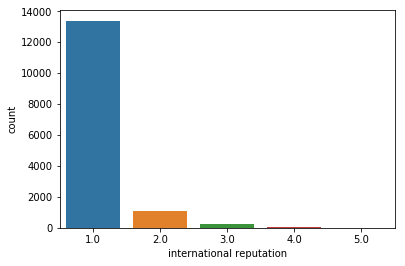

In [75]:
p = sns.countplot('international reputation', data=df_19)

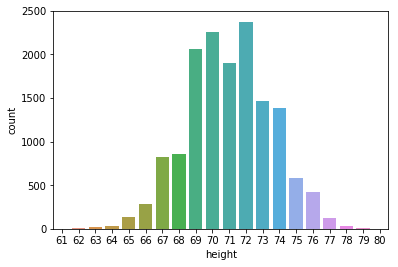

In [76]:
a= sns.countplot('height', data=df_19)

In [79]:
nations = list(df_19['nationality'].unique())
nations

160

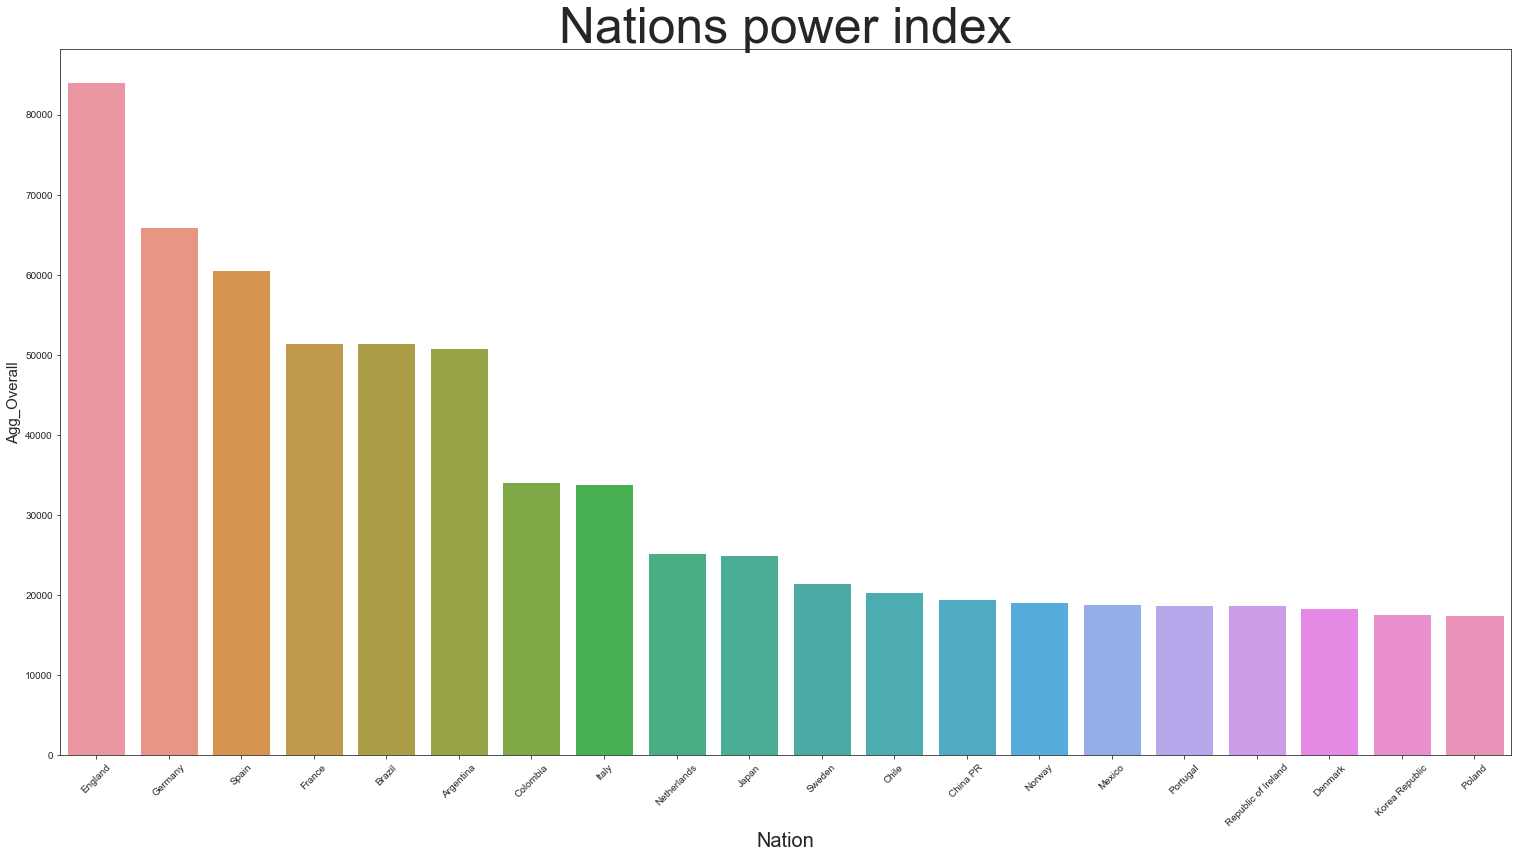

In [332]:
df_19['overall'].astype(float)
agg_overall_nation = []
for i in nations:
    x = df_19[df_19['nationality']==i]
    nation_rate = sum(x.overall)
    agg_overall_nation.append(nation_rate)
newData = pd.DataFrame({'nation_list' : nations, 'agg_overall_nation':agg_overall_nation})
new_index=(newData['agg_overall_nation'].sort_values(ascending=False)).index.values
sorted_data = newData.reindex(new_index)

#Visualization Part
plt.figure(figsize=(26,13))
sns.barplot(x=sorted_data['nation_list'][0:20], y=sorted_data['agg_overall_nation'][0:20], units=sorted_data['agg_overall_nation'][0:20])
plt.xticks(rotation= 45)
plt.xlabel('Nation', fontsize=20)
plt.ylabel('Agg_Overall', fontsize=15)
plt.title('Nations power index', fontsize=50)
plt.savefig('nationa power')

In [92]:
values = list(df_19['value'].unique())

In [103]:
#oldest clubs
df_19.groupby('club')['age'].sum().sort_values(ascending=False).head()

club
West Ham United    762
Sagan Tosu         747
Villarreal CF      738
Leicester City     729
MKE Ankaragücü     727
Name: age, dtype: int64

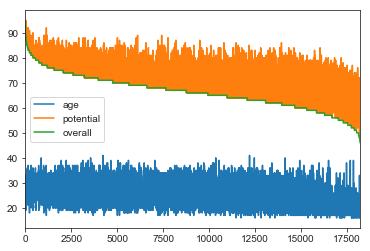

In [375]:
df_19.loc[:,['age','potential', 'overall']].plot(subplots=False);

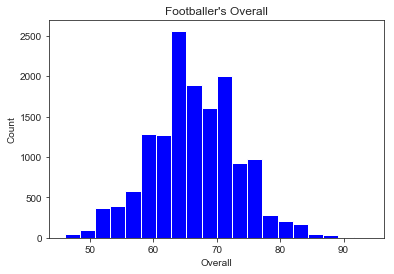

In [376]:
plt.hist(df_19.overall, bins=20, alpha=1, color='b')
plt.title("Footballer's Overall" )
plt.xlabel('Overall')
plt.ylabel('Count');

In [104]:
#youngest clubs
df_19.groupby('club')['age'].sum().sort_values(ascending=True).head()

club
Sangju Sangmu FC          315
Derry City                325
Perugia                   333
FC Sochaux-Montbéliard    365
Sligo Rovers              381
Name: age, dtype: int64

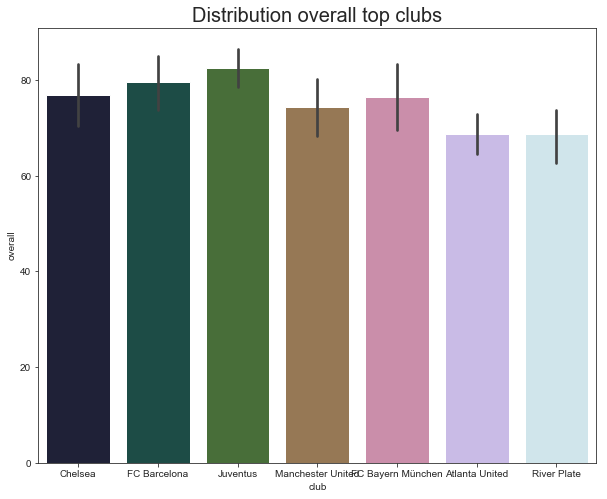

In [474]:
# The clubs and their players overalls
some_clubs = ('Juventus', 'Paris Saint-German', 'Chelsea', 'FC Barcelona', 'River Plate', 'Manchester United','FC Bayern München','Atlanta United')
df_club = df_19.loc[df_19['club'].isin(some_clubs) & df_19['age'] & df_19['overall'] ]

plt.figure(figsize=(10,8))
plt.xticks(rotation= 0)
ax = sns.barplot(x=df_club['club'], y=df_club['overall'], palette='cubehelix');
ax.set_title(label='Distribution overall top clubs', fontsize=20)
plt.savefig('top clubs overall');


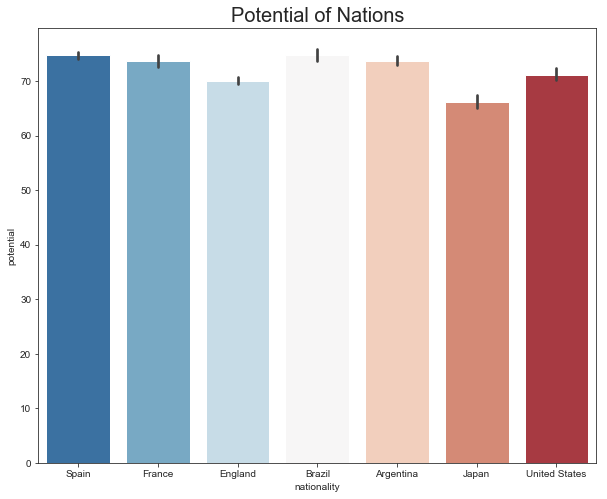

In [472]:
# The clubs and their players overalls
some_nations = ('Argentina', 'Brazil', 'France', 'Spain', 'Japan', 'England', 'United States')
df_nation = df_19.loc[df_19['nationality'].isin(some_nations) & df_19['age'] & df_19['potential'] ]


plt.figure(figsize=(10,8))
ax = sns.barplot(x=df_nation['nationality'], y=df_nation['potential'], palette="RdBu_r");
ax.set_title(label='Potential of Nations', fontsize=20);


In [271]:
(df_19[df_19['club'] == 'Atlanta United'].groupby(['nationality'])['club'].count()).index

Index(['Argentina', 'England', 'Germany', 'Jamaica', 'Paraguay',
       'Republic of Ireland', 'United States', 'Venezuela'],
      dtype='object', name='nationality')

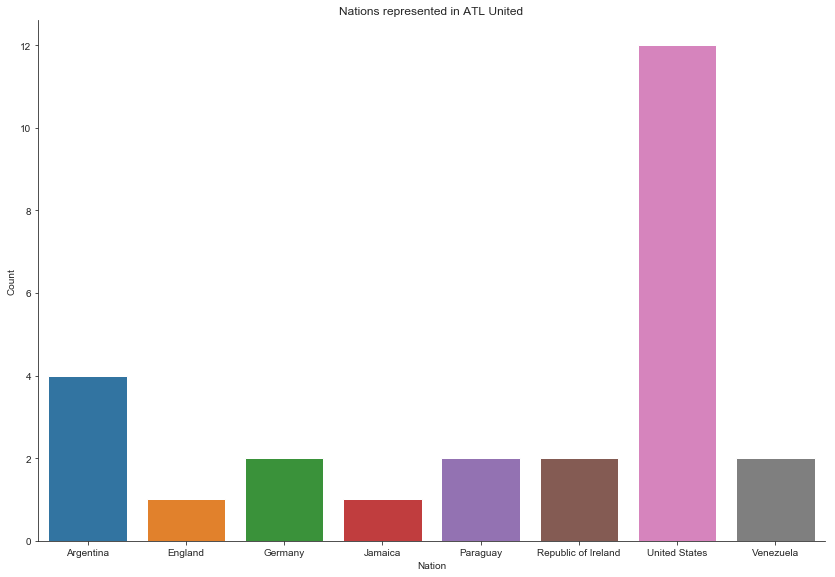

<Figure size 432x288 with 0 Axes>

In [316]:
# finds the %age of players born in X nation
sns.set_style('ticks')
ax =sns.catplot(x=(df_19[df_19['club'] == 'Atlanta United'].groupby(['nationality'])['club'].count()).index,
            y=(df_19[df_19['club'] == 'Atlanta United'].groupby(['nationality'])['club'].count()).values,
            data=df_19, kind='bar', height=8.27, aspect=11.7/8.27)
plt.ylabel('Count')
plt.xlabel('Nation')
plt.title('Nations represented in ATL United')
plt.show()
plt.savefig('ATL United');

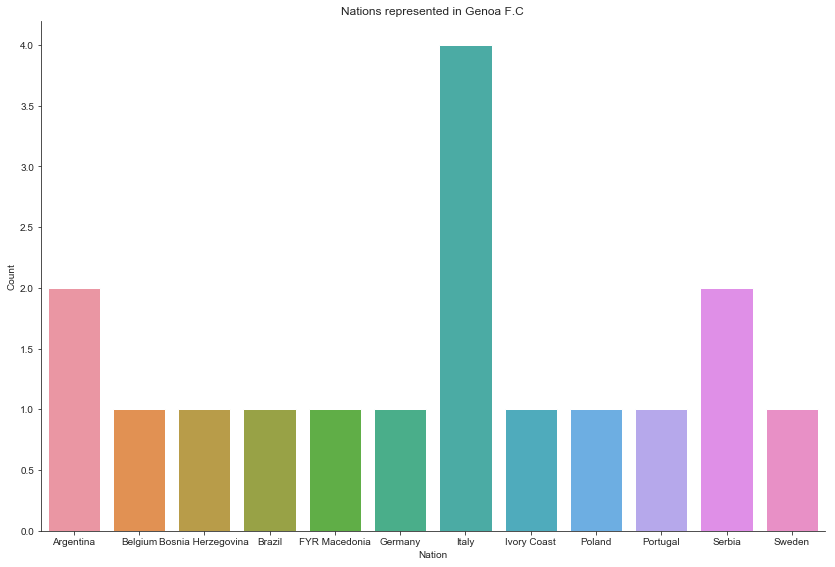

<Figure size 432x288 with 0 Axes>

In [336]:
sns.set_style('ticks')
ax =sns.catplot(x=(df_19[df_19['club'] == 'Genoa'].groupby(['nationality'])['club'].count()).index,
            y=(df_19[df_19['club'] == 'Genoa'].groupby(['nationality'])['club'].count()).values,
            data=df_19, kind='bar', height=8.27, aspect=11.7/8.27)
plt.ylabel('Count')
plt.xlabel('Nation')
plt.title('Nations represented in Genoa F.C')
plt.show()
plt.savefig('Genoa');

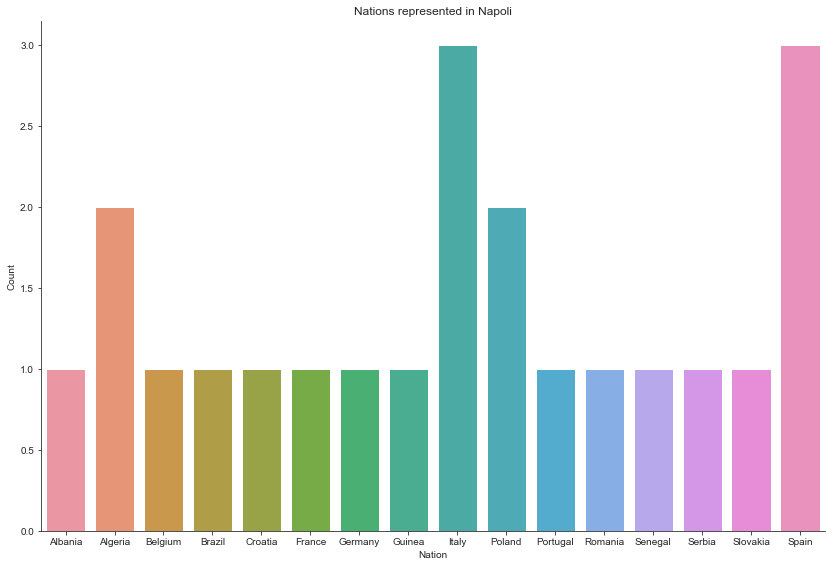

<Figure size 432x288 with 0 Axes>

In [345]:
sns.set_style('ticks')
ax =sns.catplot(x=(df_19[df_19['club'] == 'Napoli'].groupby(['nationality'])['club'].count()).index,
            y=(df_19[df_19['club'] == 'Napoli'].groupby(['nationality'])['club'].count()).values,
            data=df_19, kind='bar', height=8.27, aspect=11.7/8.27)
plt.ylabel('Count')
plt.xlabel('Nation')
plt.title('Nations represented in Napoli')
plt.show()
plt.savefig('Napoli');

In [614]:
# The clubs racial purity
clubs_racial_profile = pd.Series()
for club, players in df_19.groupby(['club'])['nationality'].count().items():
    coherency = df_19[df_19['club'] == club].groupby(['nationality'])['club'].count().max() / players * 100
    clubs_racial_profile[club] = coherency

(clubs_racial_profile.sort_values(ascending = False)).tail()

Genoa               23.529412
KAS Eupen           21.052632
New York City FC    19.047619
Udinese             15.384615
Napoli              13.636364
dtype: float64

In [618]:
pure = pd.DataFrame(clubs_racial_profile, dtype=float)
# pure.rename(columns={0: 'purity'})

pure[0:100].sort_values(by= 0,kind='heapsort', ascending=True)

,0
Bologna,23.809524
Brighton & Hove Albion,24.137931
Atalanta,27.777778
Arsenal,33.333333
Atiker Konyaspor,36.000000
Aston Villa,36.363636
Brentford,37.037037
AS Monaco,37.931034
Borussia Mönchengladbach,40.740741
Brøndby IF,40.909091


In [166]:
df_19.groupby('club')['nationality'].nunique().sort_values(ascending=False)

club
Brighton & Hove Albion                 20
Udinese                                18
West Ham United                        17
Lazio                                  16
Fulham                                 16
KRC Genk                               16
Eintracht Frankfurt                    16
Watford                                16
Manchester United                      16
Atiker Konyaspor                       16
Napoli                                 16
AS Monaco                              15
New York City FC                       15
Leicester City                         15
New England Revolution                 15
Sporting Lokeren                       15
Standard de Liège                      15
Southampton                            15
Empoli                                 15
Bologna                                15
Sint-Truidense VV                      14
Borussia Dortmund                      14
FC Dallas                              14
Vejle Boldklub               

In [ ]:
chosen_columns = ['name','age','nationality','overall','potential','special','acceleration','aggression',
'agility','balance','ballcontrol','body type','composure','crossing','curve','club','dribbling',
'fkaccuracy','finishing','gkdiving','gkhandling','gkkicking','gkpositioning','gkreflexes',
'headingaccuracy','interceptions','international reputation','jersey number','jumping','joined',
'longpassing','longshots','marking','penalties','position','positioning','preferred foot','reactions',
'shortpassing','shotpower','skill moves','slidingtackle','sprintspeed','stamina','standingtackle',
'strength','value','vision','volleys','wage','weak foot','work rate'
]

In [ ]:
df = pd.DataFrame(df_19, columns=chosen_columns)

In [ ]:
#have to change columns to int for this to work 
for i,val in df.groupby(df['position'])['position'].mean().iterrows():
    print('Position {}:{},{},{}'.format(i *tuple(val.nlargest(3).index)))

In [ ]:
tuple(val.nlargest(5).index)

In [ ]:
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[['age', 'overall', 'potential', 'value', 'wage',
                'acceleration', 'aggression', 'agility', 'balance', 'ballcontrol', 
                'body type','composure', 'crossing','dribbling', 'fkaccuracy', 'finishing', 
                'headingaccuracy', 'interceptions','international reputation',
                'joined', 'jumping', 'longpassing', 'longshots',
                'marking', 'penalties', 'position', 'positioning',
                'shortpassing', 'shotpower', 'skill moves', 'slidingtackle',
                'sprintspeed', 'stamina', 'standingtackle', 'strength', 'vision',
                'volleys']].corr(), vmin=-1, vmax=1, annot = True, linewidths=.5, cmap='icefire')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

# i see some correaltion that make sense, like potential and overall have a decent corr. 
# balance and strength have the most negative correlation. Not sure why
# international rep is highly correlated with composure... very interesting. I would of thought something like age and overall would be the highest. 

In [ ]:
def make_scatter(df):
    feats = ('agility', 'balance', 'dribbling', 'sprintspeed')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/4+1, 4, index+1,alpha=6.9)
        ax = sns.regplot(x = 'acceleration', y = feat, data = df)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.4)

make_scatter(df)

In [ ]:
def aggression(df):
    feats = ('standingtackle', 'slidingtackle', 'penalties', 'interceptions', 'finishing')
    
    for index, feat in enumerate(feats):
        plt.subplot(len(feats)/5+1, 5, index+1,alpha=1.9)
        ax = sns.regplot(x = 'aggression', y = feat, data = df)

plt.figure(figsize = (20, 20))
plt.subplots_adjust(hspace = 0.4)

aggression(df)

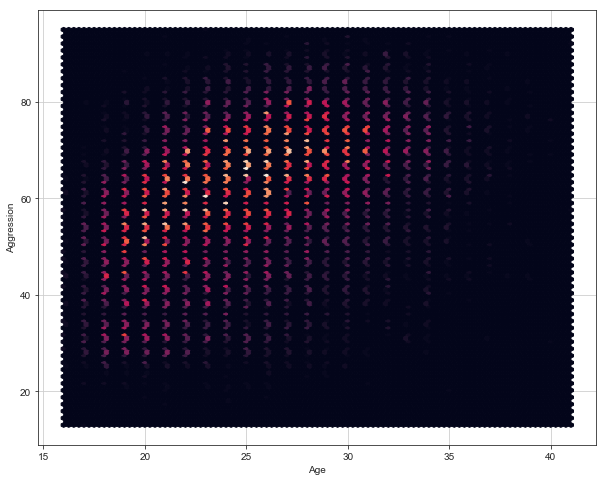

In [477]:
# Does age play a role of how aggresive you are? Nope... that shit is born within!!!
plt.figure(figsize=(10,8))
plt.hexbin(df_19['age'], df_19['aggression'])
plt.xlabel('Age')
plt.ylabel('Aggression')
plt.grid()

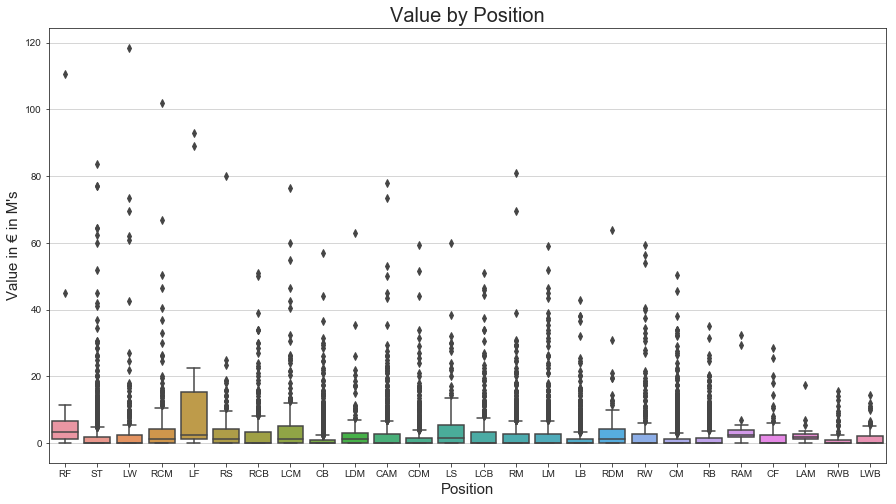

In [676]:
#value by position
sns.set_style('ticks')
avg_value_by_position = df_19.groupby('position')['value'].mean()
plt.figure(figsize=(15,8))
a = sns.boxplot(x = 'position', y = (df_19['value'])/1000000, data = df_19)
plt.xticks(rotation=0)
plt.title('Value by Position', fontsize=20)
plt.xlabel('Position', fontsize=15)
plt.ylabel("Value in € in M's", fontsize=15)
plt.grid(axis='y')
plt.show()


fig = a.get_figure()
fig.savefig('Value by Position', pad_inches=.25)


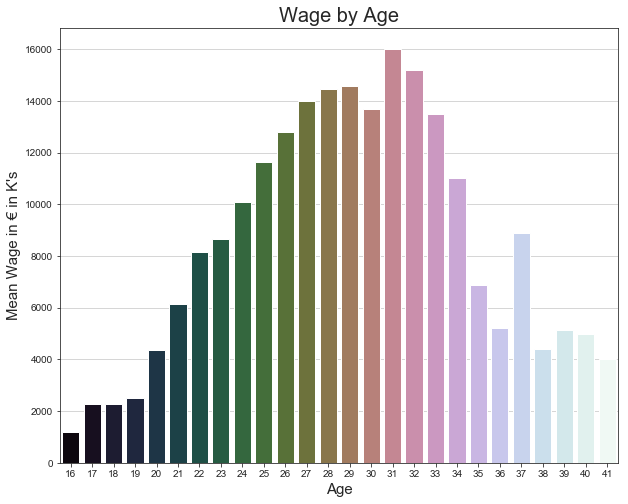

In [629]:
#wage diff by age
mean_wage_per_age = df_19.groupby('age')['wage'].mean()


plt.figure(figsize=(10,8))
plt.title('Wage by Age', fontsize=20)
plt.ylabel('Mean Wage')
p = sns.barplot(x = mean_wage_per_age.index, y = mean_wage_per_age.values, palette='cubehelix')
plt.xticks(rotation=0)
plt.ylabel("Mean Wage in € in K's", fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.grid(axis='y')
plt.show()


fig = p.get_figure()
fig.savefig('MeanWage by Age', pad_inches=.25)

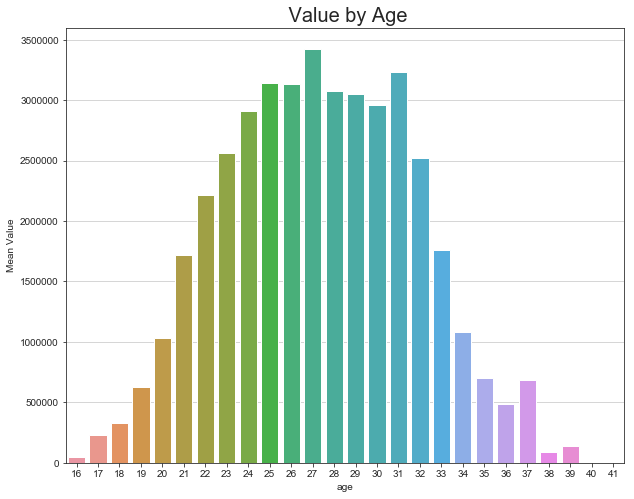

In [630]:
#value diff by age
mean_val_per_age = df_19.groupby('age')['value'].mean()

plt.figure(figsize=(10,8))
plt.title(' Value by Age', fontsize=20)
plt.ylabel('Mean Value')
p = sns.barplot(x = mean_val_per_age.index, y = mean_val_per_age.values)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


fig = p.get_figure()
fig.savefig('MeanVal by Age', pad_inches=.25)

In [457]:
#top players in position
df_19.iloc[df_19.groupby(df_19['position'])['overall'].idxmax()][['name', 'position','club','nationality','overall']]

,name,position,club,nationality,overall
21,E. Cavani,LS,Paris Saint-Germain,Uruguay,89
14,N. Kanté,LDM,Chelsea,France,89
25,K. Mbappé,RM,Paris Saint-Germain,France,88
320,Laure Santeiro,CAM,Fluminense,Brazil,81
79,Marco Asensio,RW,Real Madrid,Spain,85
422,F. Balbuena,RCB,West Ham United,Paraguay,80
45,P. Pogba,RDM,Manchester United,France,87
30,Isco,LW,Real Madrid,Spain,88
13,David Silva,LCM,Manchester City,Spain,90
16,H. Kane,ST,Tottenham Hotspur,England,89


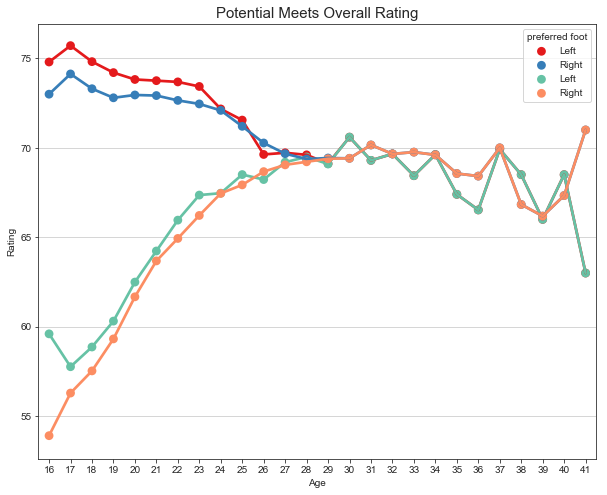

In [572]:
# potential v overall 
sns.set_style('ticks')

plt.figure(figsize=(10,8))
ax = sns.pointplot('age','potential', data=df_19, linestyle='-', marker='*', hue='preferred foot',palette="Set1", ci=False)
sns.pointplot('age','overall', data=df_19, linestyle='-.', marker='*', hue='preferred foot', ax=ax, ci=False, palette='Set2')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Rating',fontsize=10)
plt.grid(axis='y')
plt.title('Potential Meets Overall Rating',fontsize=15)
plt.show()


fig = ax.get_figure()
fig.savefig('Potential Meets Overall Rating', pad_inches=.25)

In [671]:
# print(df_19['age'].mean())

# print('--------')

# print(df_19.groupby(by='position')['age'].mean())

df_19[(df_19['age'] == 30) & (df_19['wage'] > 1000)]

#101, 109, 128, 143, where wage equals 1000

#692, 691, 800, 827 where wage is higher than 1000 

,id,name,age,nationality,overall,potential,club,value,wage,special,preferred foot,international reputation,weak foot,skill moves,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,Lean,Normal,Stocky,High/ High,High/ Low,High/ Medium,Low/ High,Low/ Low,Low/ Medium,Medium/ High,Medium/ Low,Medium/ Medium,physical,skills,payoff,mental
23,153079,S. Agüero,30,Argentina,89,89,Manchester City,64500000,300000,2107,Right,4.0,4.0,4.0,ST,10.0,"Jul 28, 2011",N/A,2021,68,154,86+3,86+3,86+3,86+3,87+3,87+3,87+3,86+3,85+3,85+3,85+3,83+3,76+3,76+3,76+3,83+3,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,0,0,1,0,0,1,0,0,0,0,0,0,859.0,1014.0,0,561.0
35,176676,Marcelo,30,Brazil,88,88,Real Madrid,43000000,285000,2279,Left,4.0,4.0,5.0,LB,12.0,"Jan 1, 2007",N/A,2022,69,176,80+3,80+3,80+3,84+3,83+3,83+3,83+3,84+3,84+3,84+3,84+3,85+3,84+3,84+3,84+3,85+3,85+3,83+3,83+3,83+3,85+3,84+3,81+3,81+3,81+3,84+3,90.0,70.0,75.0,84.0,54.0,90.0,85.0,67.0,76.0,92.0,83.0,82.0,86.0,88.0,86.0,83.0,76.0,91.0,78.0,70.0,84.0,85.0,85.0,82.0,59.0,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,0,1,0,0,1,0,0,0,0,0,0,0,887.0,1116.0,0,644.0
52,171877,M. Hamšík,30,Slovakia,87,87,Napoli,46500000,125000,2188,Right,3.0,5.0,3.0,LCM,17.0,"Jul 1, 2007",N/A,2020,72,174,81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,82+3,84+3,84+3,84+3,82+3,77+3,78+3,78+3,78+3,77+3,75+3,72+3,72+3,72+3,75+3,78.0,79.0,74.0,88.0,79.0,86.0,80.0,72.0,83.0,87.0,69.0,68.0,76.0,88.0,66.0,82.0,71.0,84.0,67.0,83.0,56.0,72.0,88.0,86.0,70.0,84.0,75.0,73.0,62.0,8.0,6.0,4.0,14.0,14.0,0,1,0,0,0,1,0,0,0,0,0,0,807.0,1114.0,0,622.0
53,168651,I. Rakitić,30,Croatia,87,87,FC Barcelona,46500000,260000,2184,Right,4.0,3.0,3.0,RCM,4.0,"Jul 1, 2014",N/A,2021,72,172,77+3,77+3,77+3,80+3,81+3,81+3,81+3,80+3,82+3,82+3,82+3,81+3,84+3,84+3,84+3,81+3,77+3,79+3,79+3,79+3,77+3,75+3,70+3,70+3,70+3,75+3,84.0,83.0,58.0,87.0,80.0,84.0,88.0,84.0,90.0,87.0,66.0,59.0,72.0,77.0,66.0,84.0,39.0,84.0,66.0,90.0,67.0,75.0,79.0,86.0,82.0,81.0,72.0,74.0,70.0,14.0,11.0,12.0,5.0,9.0,0,1,0,1,0,0,0,0,0,0,0,0,745.0,1149.0,0,623.0
89,192366,N. Otamendi,30,Argentina,85,85,Manchester City,28500000,170000,1916,Right,3.0,3.0,2.0,CB,30.0,"Aug 20, 2015",N/A,2022,72,179,64+3,64+3,64+3,59+3,61+3,61+3,61+3,59+3,62+3,62+3,62+3,61+3,67+3,67+3,67+3,61+3,72+3,77+3,77+3,77+3,72+3,74+3,82+3,82+3,82+3,74+3,52.0,54.0,85.0,75.0,57.0,51.0,50.0,39.0,72.0,70.0,57.0,61.0,64.0,79.0,62.0,69.0,92.0,67.0,80.0,56.0,91.0,84.0,51.0,53.0,45.0,80.0,83.0,85.0,84.0,12.0,5.0,8.0,11.0,12.0,0,1,0,1,0,0,0,0,0,0,0,0,785.0,904.0,0,569.0
101,178518,R. Nainggolan,30,Belgium,85,85,Inter,35500000,105000,2278,Right,3.0,3.0,3.0,CAM,14.0,"Jul 1, 2018",N/A,2022,69,170,78+3,78+3,78+3,80+3,81+3,81+3,81+3,80+3,81+3,81+3,81+3,80+3,83+3,83+3,83+3,80+3,83+3,84+3,84+3,84+3,83+3,83+3,81+3,81+3,81+3,83+3,73.0,75.0,59.0,84.0,75.0,80.0,73.0,68.0,81.0,85.0,78.0,73.0,76.0,87.0,82.0,84.0,76.0,93.0,77.0,86.0,88.0,86.0,86.0,76.0,63.0,84.0,83.0,86.0,90.0,11.0,11.0,14.0,8.0,11.0,0,0,1,1,0,0,0,0,0,0,0,0,853.0,1105.0,0,656.0
105,165153,K. Benzema,30,France,85,85,Real Madrid,37000000,240000,2000,Right,4.0,4.0,4.0,ST,9.0,"Jul 9, 2009",N/A,2021,73,179,81+3,81+3,81+3,81+3,82+3,82+3,82+3,81+3,81+3,81+3,81+3,80+3,73+3,73+3,73+3,80+3,57+3,56+3,56+3,56+3,57+3,53+3,49+3,49+3,49+3,53+3,75.0,81.0,80.0,83.0,82.0,83.0,79.0,73.0,62.0,86.0,76.0,76.0,76.0,83.0,66.0,81.0,73.0,75.0,80.0,75.0,65.0,22.0,86

In [549]:
color_dict = {df_19['preferred foot'][0]:'b',df_19['preferred foot'][1]:'y'}
color_series = df_19['preferred foot'].map(color_dict)

In [458]:
# Club wise check the top 10 total potential
df_19.groupby(['club'])['potential'].sum().sort_values(ascending = False).head(10)

club
FC Barcelona         2486
Manchester United    2481
Liverpool            2474
Atlético Madrid      2470
Real Madrid          2466
Manchester City      2455
Arsenal              2440
Borussia Dortmund    2396
Tottenham Hotspur    2390
AS Monaco            2363
Name: potential, dtype: int64

In [ ]:
#160 out of 195 nations are represented in fifa. 
#df.groupby(by='nationality').groups.keys()

fifa_list = [each for each in df.groupby(by='nationality').groups.keys()]

In [ ]:
fifa_list

In [ ]:
countries = ['Afghanistan','Aland Islands','Albania','Algeria','American Samoa','Andorra','Angola',
    'Anguilla','Antarctica','Antigua & Barbuda','Argentina','Armenia','Aruba','Australia','Austria',
'Azerbaijan','Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium','Belize','Benin',
'Bermuda','Bhutan','Bolivia','Bonaire','Bosnia Herzegovina','Botswana','Bouvet Island','Brazil','British Indian Ocean Territory',
'Brunei Darussalam','Bulgaria','Burkina Faso','Burundi','Cambodia','Cameroon','Canada','Cape Verde',
'Cayman Islands','Central African Rep.','Chad','Chile','China PR','Christmas Island','Cocos Islands',
'Colombia','Comoros','DR Congo','Cook Islands','Costa Rica','Ivory Coast','Croatia','Cuba','Curacao','Cyprus','Czech Republic',
'Denmark','Djibouti','Dominica','Dominican Republic','Ecuador','Egypt','El Salvador','Equatorial Guinea',
'Eritrea','Estonia','Ethiopia','Falkland Islands','Faroe Islands','Fiji','Finland','France','French Guiana','French Polynesia','French Southern Territories',
'Gabon','Gambia','Georgia','Germany','Ghana','Gibraltar','Greece','Greenland','Grenada','Guadeloupe',
'Guam','Guatemala','Guernsey','Guinea','Guinea-Bissau','Guyana','Haiti','Honduras','Hong Kong',
'Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland','Isle of Man','Israel','Italy',
'Jamaica','Japan','Jordan','Kazakhstan','Kenya','Kiribati',"Korea DPR",'Korea Republic','Kuwait',
'Kyrgyzstan',"Laos",'Latvia','Lebanon','Lesotho','Liberia','Libya','Liechtenstein','Lithuania',
'Luxembourg','Macao','FYR Macedonia','Madagascar','Malawi','Malaysia','Maldives','Mali','Malta',
'Marshall Islands','Martinique','Mauritania','Mauritius','Mayotte','Mexico','Micronesia','Moldova'
'Monaco','Mongolia','Montenegro','Montserrat','Morocco','Mozambique','Myanmar','Namibia','Nauru',
'Nepal','Netherlands','New Caledonia','New Zealand','Nicaragua','Niger','Nigeria','Niue','Norfolk Island',
'Northern Mariana Islands','Norway','Oman','Pakistan','Palau','Palestine',
'Panama','Papua New Guinea','Paraguay','Peru','Philippines','Pitcairn','Poland','Portugal','Puerto Rico',
'Qatar','Reunion','Romania','Russia','Rwanda','Saint Barthelemy','Saint Helena, Ascension and Tristan da Cunha',
'Saint Kitts and Nevis','Saint Lucia','Saint Martin','Saint Pierre and Miquelon','Saint Vincent and the Grenadines','Samoa',
'San Marino','Sao Tome and Principe','Saudi Arabia','Senegal','Serbia','Seychelles','Sierra Leone',
'Singapore','Slovakia','Slovenia','Solomon Islands','Somalia','South Africa','South Georgia and the South Sandwich Islands',
'South Sudan','Spain','Sri Lanka','Sudan','Suriname','Svalbard and Jan Mayen','Swaziland','Sweden',
'Switzerland','Syria','Taiwan','Tajikistan','Tanzania','Thailand','Timor-Leste','Togo','Tokelau','Tonga','Trinidad and Tobago','Tunisia','Turkey',
'Turkmenistan','Turks and Caicos Islands','Tuvalu','Uganda','Ukraine','United Arab Emirates','United Kingdom',
'United States','Uruguay','Uzbekistan','Vanuatu','Venezuela','Vietnam','Virgin Islands, British','Virgin Islands, U.S.',
'Wallis and Futuna','Western Sahara','Yemen','Zambia','Zimbabwe']

In [ ]:
# what countries are left out of fifa 19
left_out = list(set(countries).difference(fifa_list))

In [ ]:
# left_out.sort()

# left_out

#Fifa breaks up the UK as individual soverignty to show the players distinct nationality. Interesting 
#to me because i feel they secretly considered the politics of brexit and the scottish wanting independence.  

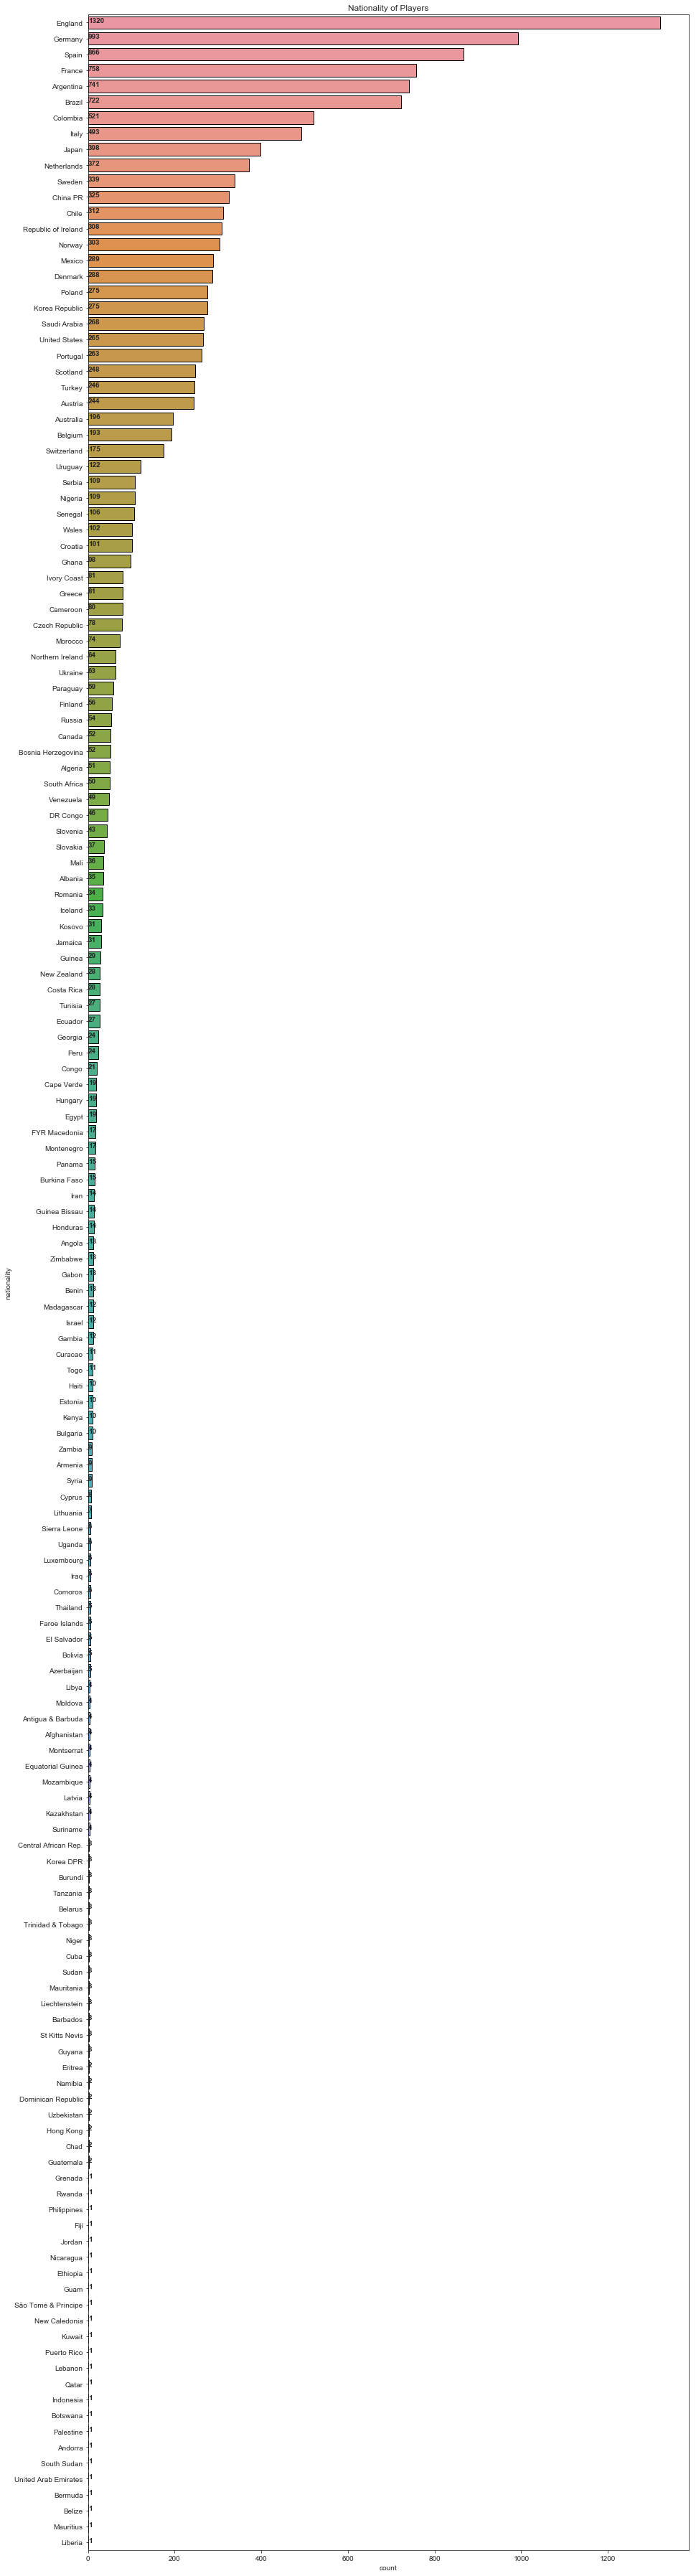

In [680]:
# player count by nationality

#need to figure out how just get the top 20 and bottom top
plt.figure(figsize=(15,65))

ax= sns.countplot(y = df_19['nationality'],
                 order = df_19['nationality'].value_counts().index,
                 linewidth = 1, edgecolor= 'k'*df_19['nationality'].nunique())
for i,j in enumerate(df_19['nationality'].value_counts().values):
    ax.text(.7,i,j,weight='bold')
plt.title('Nationality of Players')
plt.show()
fig = ax.get_figure()
fig.savefig('nationality of players', pad_inches=.25)

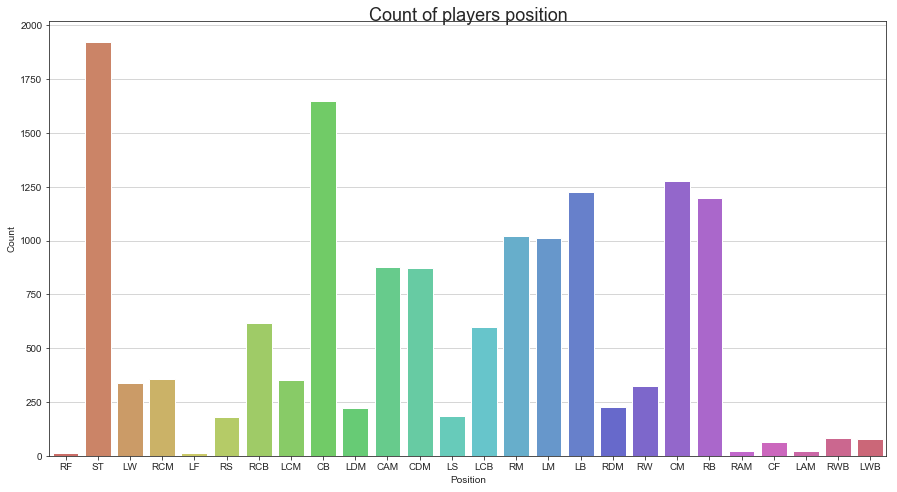

In [577]:
#players by pos
plt.figure(figsize=(15,8))
ax = sns.countplot(x='position',data=df_19, palette='hls')
ax.set_title(label='Count of players position', fontsize=18, pad=.1)

plt.xlabel('Position', fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.grid(axis='y')
plt.show()


fig = ax.get_figure()
fig.savefig('count of players by position', pad_inches=.25);

In [ ]:
che.position.value_counts(normalize=False).index

In [ ]:
che.position.value_counts(normalize=False).values

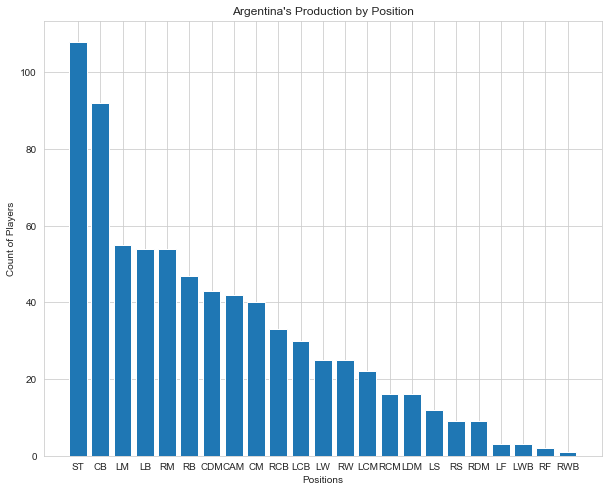

In [414]:
plt.figure(figsize=(10,8))
che = df_19[df_19['nationality'] == 'Argentina']
plt.bar(che.position.value_counts(normalize=False).index, che.position.value_counts(normalize=False).values)
plt.xlabel('Positions')
plt.ylabel('Count of Players')
plt.title('Argentina\'s Production by Position')
plt.savefig('Argento production');

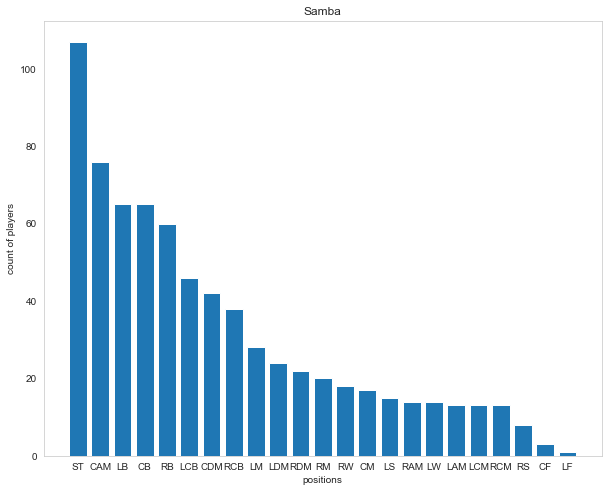

In [416]:
plt.figure(figsize=(10,8))
samba = df_19[df_19['nationality'] == 'Brazil']
plt.grid()
plt.bar(samba.position.value_counts(normalize=False).index, samba.position.value_counts(normalize=False).values)
plt.xlabel('positions')
plt.ylabel('count of players')
plt.title('Samba');

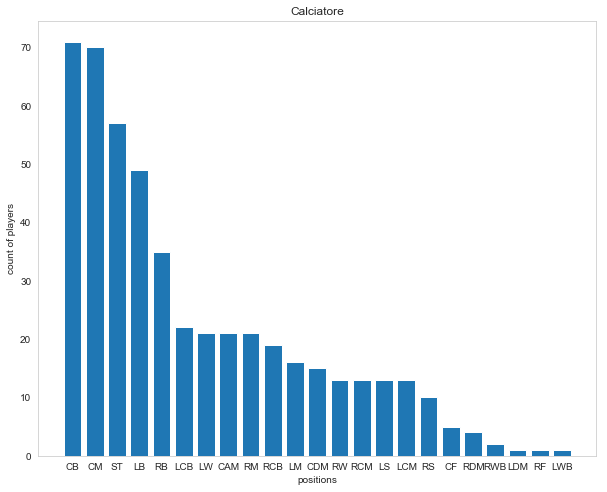

In [419]:
plt.figure(figsize=(10,8))
plt.grid()
pasta = df_19[df_19['nationality'] == 'Italy']
plt.bar(pasta.position.value_counts(normalize=False).index, pasta.position.value_counts(normalize=False).values)
plt.xlabel('positions')
plt.ylabel('count of players')
plt.title('Calciatore');

In [ ]:
# what position is produced the most by each nation??

In [ ]:
df_19.head()

In [87]:
# #change Value and Salary to int. 
# ex = df_19['value'][0:15]
# ex = [i.strip('M') for i in ex]

# ex = [i.strip('€') for i in ex]

# ex =pd.DataFrame(ex)

# ex.rename(columns={0: '€ in Mill'})

#---------------------------------------------------

#got this from D
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]
        
        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 100
    except ValueError:
        value = 0
    return value

#df_19['value'] = df_19['value'].apply(value_to_int)

#change to int
df_19['value']= df_19.value.astype(int)

In [88]:
#fixed wages to the thousands

def wage_to_int(df_wage):
    try:
        value = df_wage[1:-1]
        suffix = df_wage[-1:]
        
        if suffix =='€':
            value = value * 1000
        elif suffix == 'K':
            value = value * 1
    except ValueError:
        value = 0
    return value
wage_to_int('€565K')

df_19['wage']= df_19['wage'].apply(wage_to_int).astype(int) * 1000

In [ ]:
# overall corr with value
sns.regplot(df_19['overall'],(df_19['value']/1000000));

In [422]:
df_19[df_19['preferred foot'] == 'Right'][['name','overall','position']].head()

,name,overall,position
1,Cristiano Ronaldo,94,ST
2,Neymar Jr,92,LW
4,K. De Bruyne,91,RCM
5,E. Hazard,91,LF
6,L. Modrić,91,RCM


In [423]:
df_19[df_19['preferred foot'] == 'Left'][['name','overall','position']].head()

,name,overall,position
0,L. Messi,94,RF
13,David Silva,90,LCM
15,P. Dybala,89,LF
17,A. Griezmann,89,CAM
24,G. Chiellini,89,LCB


In [ ]:
# this is from Daria
sns.lmplot(x='shortpassing', y='longpassing', data=df_19, scatter_kws={'alpha':.1},col='preferred foot');

In [ ]:
df_19[(df_19['nationality'] == 'Afghanistan') & (df_19['age'] == 26)]

In [ ]:
df_19['work rate'].unique()

### get work rate column one coded

In [ ]:
[each.split('/')[0] for each in ex['work rate']]

In [ ]:
# [each.split('/')[0] for each in ex['work rate']]

# def convert_stat(x):
#     if x == 'Low':
#         return 0
#     elif x == 'Medium':
#         return 1
#     else:
#         return 2
        
# convert_stat('smedium')

In [ ]:
# ### feature engineering. Work rated are rated 0 to 8. Just bc a player has a 0 work rate doesnt mean the player has low skill
# ### bu instead it deals with positioning on the pitch. A player that has low/low work rate will be beneficial for 
# ### a manager with a need for his CDM mids to stay with the defense. The manger has to decide where to use that work rate. 
# def work_converter(x):
#     if x == 'Low/ Low':
#         return 0
#     elif x == 'Low/ Medium':
#         return 1
#     elif x == 'Low/ High':
#         return 2
#     elif x == 'Medium/ Low':
#         return 3
#     elif x == 'Medium/ Medium':
#         return 4
#     elif x == 'Medium/ High':
#         return 5
#     elif x == 'High/ Low':
#         return 6
#     elif x == 'High/ Medium':
#         return 7
#     elif x == 'High/ High':
#         return 8
# ex['work_to_num'] = [work_converter(each) for each in ex['work rate']] 
# ex.head()

In [ ]:
### Did a bit of feature engineering.. I split up the work rate column from def and off. converted low to high to numrical 
#ex['off_work_rate'] = [each.split('/')[1].strip() for each in ex['work rate']]
#ex['off_work_rate'] = [convert_stat(each) for each in ex['off_work_rate']]
ex.head()

#ex['def_work_rate'] = [each.split('/')[0].strip() for each in ex['work rate']]
#ex['def_work_rate'] = [convert_stat(each) for each in ex['def_work_rate']]

In [ ]:
#df_19.groupby('nationality').max()[['age', 'overall', 'potential']]
#ex = df_19[(df_19['nationality'] == "Argentina") & (df_19['age'] <=20)]


#ex['work rate'].unique()
#sns.re(x=ex['age'],y=ex['work_to_num']);

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


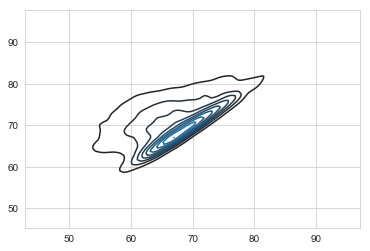

In [424]:
sns.kdeplot(data=df_19[['overall', 'potential']]);

In [ ]:
sns.kdeplot(data=ex['age'], data2=ex['value']/100000);

_____-------_______---------

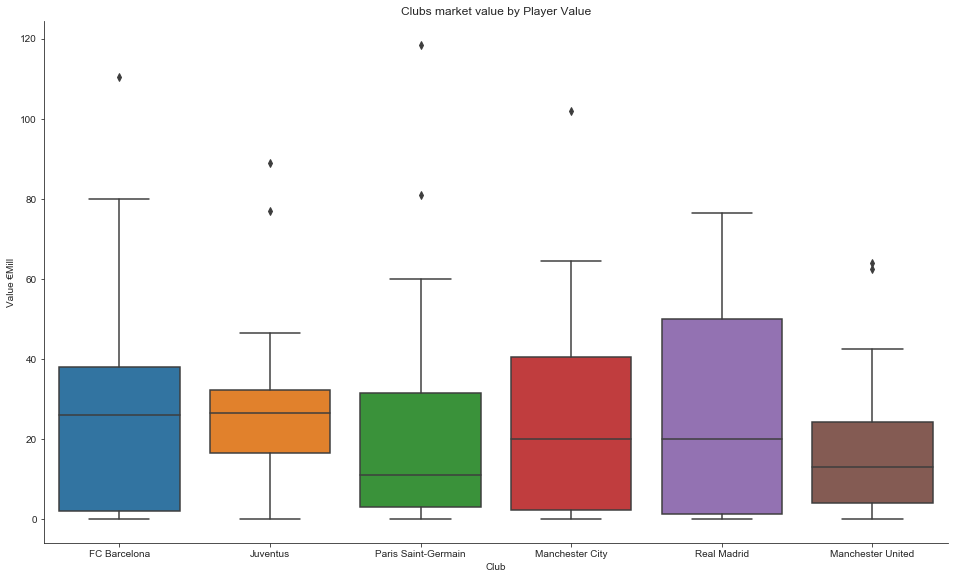

<Figure size 432x288 with 0 Axes>

In [371]:
# clubs = ['FC Barcelona', 'Real Madrid', 'Juventus', 'Paris Saint-Germain','Manchester United', 'Manchester City']
# df_19[df_19['club'].isin(clubs)]
sns.set_style('ticks')
ax = sns.catplot(x='club', y=df_19['value']/1000000, data=df_19[df_19['club'].isin(clubs)], kind='box', 
            height=8, aspect=3.5)

plt.xticks(rotation= 0)
plt.ylabel('Value €Mill')
plt.xlabel('Club')
plt.title('Clubs market value by Player Value')
plt.show()
plt.savefig('top clubs value');



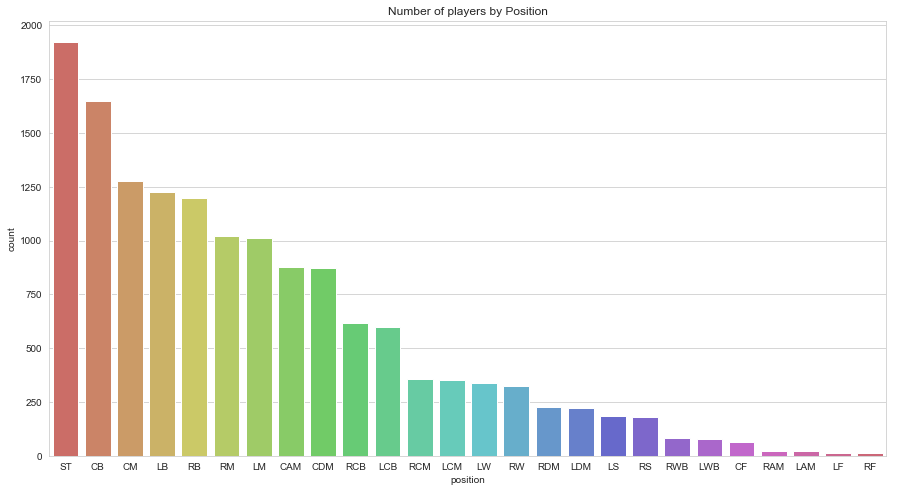

<Figure size 432x288 with 0 Axes>

In [386]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df_19['position'], 
                   order= df_19['position'].value_counts().index,
                   palette='hls', linewidth=1)

plt.title('Number of players by Position')
plt.show()
plt.savefig('#_players_pos');

In [395]:
### fixed all the boody types to create dummy columns. 
df_19['body type'].unique()

#df_19['body type'][26] = 'Normal'
#df_19['body type'][0:3] = 'Normal'
#df_19['body type'][370] = 'Lean'
#df_19['body type'][9501] = 'Stocky'

#df_19[(df_19['body type'] == 'Akinfenwa')]

array(['Normal', 'Lean', 'Stocky'], dtype=object)

In [396]:
#Get dummies
# dummy = pd.get_dummies(df_19['body type'], sparse=False, dtype=int)
# dummy.head()

df_19= pd.concat([df_19,pd.get_dummies(df_19['body type'],sparse=False,dtype=int)],axis=1).drop(['body type'], axis=1)


#dummied work rate and dropped original column
df_19= pd.concat([df_19,pd.get_dummies(df_19['work rate'],dtype=int)],axis=1).drop(['work rate'], axis=1)

#df = pd.concat([df,pd.get_dummies(df['mycol'], prefix='mycol',dummy_na=True)],axis=1).drop(['mycol'],axis=1)

In [400]:
#create gene
df_19['physical']= df_19['acceleration'] + df_19['agility'] + df_19['balance'] + df_19['jumping'] \
+ df_19['reactions'] + df_19['sprintspeed'] + df_19['stamina'] + df_19['strength'] + df_19['Lean'] \
+ df_19['Normal'] + df_19['Stocky'] + df_19['height'] + df_19['weight'] + df_19['High/ High'] + df_19['High/ Low'] \
+ df_19['Medium/ Low'] + df_19['Medium/ Medium']+ df_19['High/ Medium'] + df_19['Low/ High'] + df_19['Low/ Low']\
+ df_19['Low/ Medium'] + df_19['Medium/ High'] - df_19['age']


In [401]:
df_19['skills']= df_19['ballcontrol'] + df_19['crossing'] + df_19['curve'] + \
df_19['dribbling'] + df_19['finishing'] + df_19['fkaccuracy'] + df_19['headingaccuracy'] + \
df_19['longpassing'] + df_19['longshots'] + df_19['shortpassing'] + df_19['shotpower'] + df_19['skill moves'] + \
df_19['slidingtackle'] + df_19['standingtackle'] + df_19['volleys']  +  df_19['weak foot']

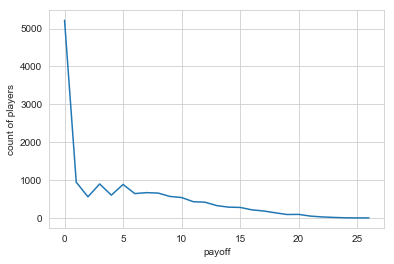

In [402]:
#Engineered 
df_19['payoff'] = df_19['potential']-df_19['overall'] 
plt.plot(df_19.groupby(by='payoff').size())
plt.ylabel('count of players')
plt.xlabel('payoff');

In [403]:
df_19['mental'] = df_19['aggression'] + df_19['composure'] + df_19['interceptions'] + df_19['marking'] \
+ df_19['payoff'] + df_19['positioning'] + df_19['reactions'] + df_19['international reputation'] + df_19['penalties'] \
+ df_19['vision']


In [404]:
df_19.shape

(14751, 97)

In [ ]:
color_dict = {0:'red', 1:'blue', 2:'green', 3:'yellow', 4:'ochre'}
color_series = classes.map(color_dict)

### Ridge, Lasso, Linear Regression 

In [ ]:
features = df_19[['potential','reactions','ballcontrol', 'international reputation','composure',
                  'overall', 'special','skill moves','dribbling']]
features = features.astype(int)

X= features
y=df_19['value']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.33,
                                                random_state=42)
print (len(X_test))
print (len(y_test))

In [ ]:
lr = LinearRegression(n_jobs=40)
lr.fit(X_train,y_train)

In [ ]:
rr = RidgeCV(cv=5)
rr.fit(X_train,y_train)

In [ ]:
rr100= RidgeCV(cv=100)
rr100.fit(X_train,y_train)

In [ ]:
lasso = LassoCV(cv=100,max_iter=2000,random_state=42,n_jobs=30)
lasso.fit(X_train,y_train)
lasso_train_score=lasso.score(X_train,y_train)
lasso_test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
coeff_used

In [ ]:
lasso.coef_

In [ ]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
print ("lasso regression train score:", lasso_train_score)
print ('lasso regression test score:', lasso_test_score)